<a href="https://colab.research.google.com/github/abbas070/MITFutureMakers/blob/main/housing-price-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trained model with 90.97% accuracy

The dataset I used can be found here: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view.

In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [3]:
# Get dataset
!gdown https://drive.google.com/uc?id=1GfvKA0qznNVknghV4botnNxyH-KvODOC

Downloading...
From: https://drive.google.com/uc?id=1GfvKA0qznNVknghV4botnNxyH-KvODOC
To: /content/housepricedata.csv
100% 45.1k/45.1k [00:00<00:00, 65.1MB/s]


In [4]:
df = pd.read_csv("/content/housepricedata.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
df.describe()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


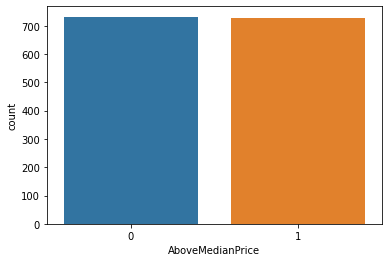

In [6]:
sns.countplot(x="AboveMedianPrice", data=df)


In [7]:
# Get Xs and ys
X = df.drop(columns=["AboveMedianPrice"])
y = df["AboveMedianPrice"]

In [8]:
# Scale input
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [9]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape, y_train.shape)

(1168, 10) (1168,)


In [10]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print(y_train.shape)

(1168, 2)


In [11]:
# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation='sigmoid'))

opt = Adam(learning_rate=0.00107)

# Train the model
model.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['acc']
)
                   
history = model.fit(
  X_train, y_train,
  epochs=100, 
  batch_size=32,
  validation_split=0.15,
  shuffle=True
)

Epoch 1/100
31/31 [==============================] - 4s 13ms/step - loss: 0.8295 - acc: 0.6089 - val_loss: 0.7778 - val_acc: 0.5568
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7146 - acc: 0.7117 - val_loss: 0.6166 - val_acc: 0.8125
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5550 - acc: 0.8226 - val_loss: 0.5155 - val_acc: 0.7614
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4870 - acc: 0.8327 - val_loss: 0.4511 - val_acc: 0.8295
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4548 - acc: 0.8569 - val_loss: 0.4397 - val_acc: 0.8466
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4529 - acc: 0.8528 - val_loss: 0.4163 - val_acc: 0.8352
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4249 - acc: 0.8659 - val_loss: 0.4286 - val_acc: 0.8466
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4068 - 

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

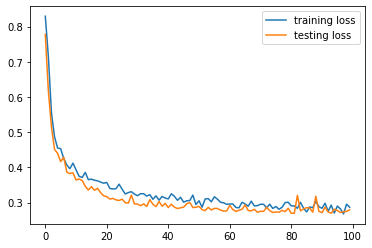

In [13]:
# Show model training graph
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.legend();

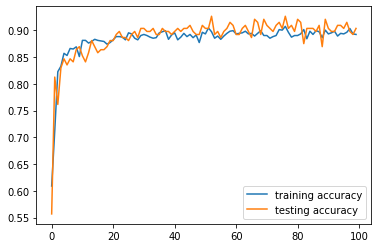

In [14]:
# Show model training graph
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.legend();

In [15]:
# Evaluate the model
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.2342 - acc: 0.9075


[0.23419591784477234, 0.9075342416763306]

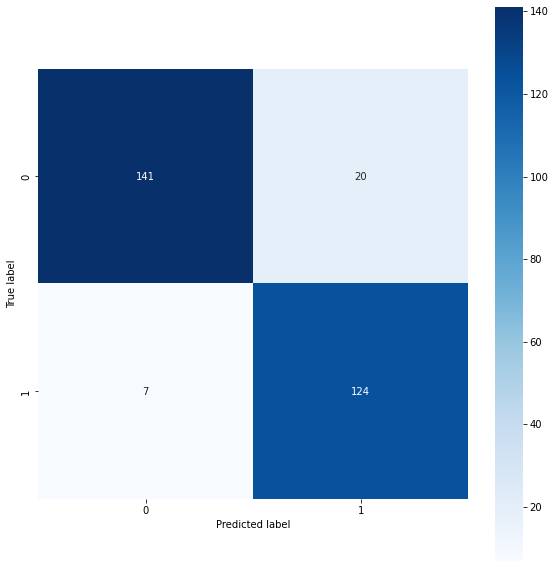

In [16]:
# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt="")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
print("Precision:", precision_score(y_test_round, y_pred))
print("Recall:", recall_score(y_test_round, y_pred))
print("F1 score:", f1_score(y_test_round,y_pred))

Precision: 0.8611111111111112
Recall: 0.9465648854961832
F1 score: 0.9018181818181819
